## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Sensor Data
**Steps**:
1. Load Dataset
2. Feature Selection
3. Isolation Forest Implementation
4. Plot Results

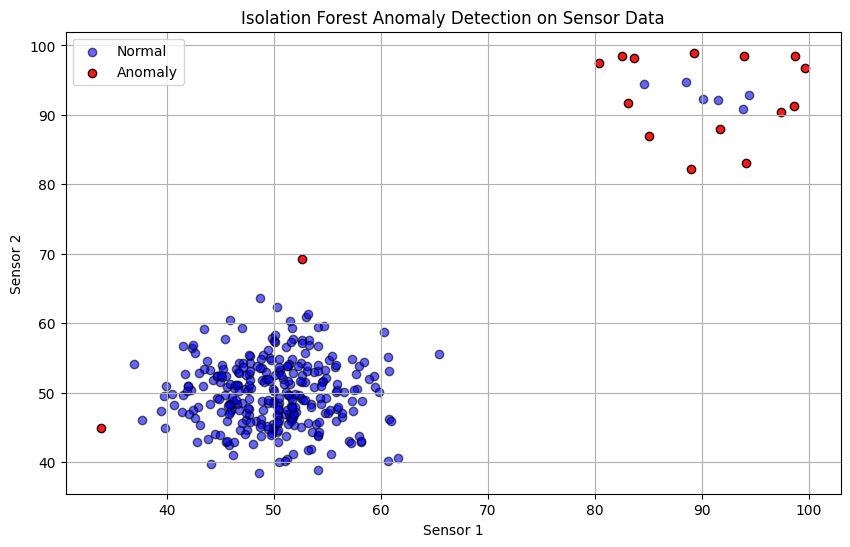

In [1]:
# write your code from here
# Step 1: Load Dataset
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# For demonstration, let's create a synthetic sensor dataset
# Assume two sensor features: 'sensor1' and 'sensor2'
import numpy as np

np.random.seed(42)
# Normal data: centered around (50, 50)
normal_data = np.random.normal(loc=50, scale=5, size=(300, 2))

# Inject some anomalies far from the center
anomalies = np.random.uniform(low=80, high=100, size=(20, 2))

# Combine into one dataset
data = np.vstack([normal_data, anomalies])
df = pd.DataFrame(data, columns=['sensor1', 'sensor2'])

# Step 2: Feature Selection
# Here, we’ll use both sensor1 and sensor2 as features
X = df[['sensor1', 'sensor2']]

# Step 3: Isolation Forest Implementation
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['anomaly'] = iso_forest.predict(X)

# Step 4: Plot Results
plt.figure(figsize=(10, 6))

# Normal points
normal = df[df['anomaly'] == 1]
plt.scatter(normal['sensor1'], normal['sensor2'], c='blue', label='Normal', alpha=0.6, edgecolors='k')

# Anomalies
anomalous = df[df['anomaly'] == -1]
plt.scatter(anomalous['sensor1'], anomalous['sensor2'], c='red', label='Anomaly', alpha=0.9, edgecolors='k')

plt.title('Isolation Forest Anomaly Detection on Sensor Data')
plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.legend()
plt.grid(True)
plt.show()
